# <div align="center"><b> Exploración de datos EuroSAT-RGB </b></div>

<div align="right">

<!-- [![Binder](http://mybinder.org/badge.svg)](https://mybinder.org/) -->
[![nbviewer](https://img.shields.io/badge/render-nbviewer-orange?logo=Jupyter)](https://nbviewer.org/)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/)

</div>

* * *

<style>
/* Limitar la altura de las celdas de salida en html */
.jp-OutputArea.jp-Cell-outputArea {
    max-height: 500px;
}
</style>

🛻 <em><font color='MediumSeaGreen'>  Instalaciones: </font></em> 🛻


Este notebook utiliza [Poetry](https://python-poetry.org/) para la gestión de dependencias.
Primero instala Poetry siguiendo las instrucciones de su [documentación oficial](https://python-poetry.org/docs/#installation).
Luego ejecuta el siguiente comando para instalar las dependencias necesarias y activar el entorno virtual:

- Bash:

```bash
poetry install
eval $(poetry env activate)
```

- PowerShell:

```powershell
poetry install
Invoke-Expression (poetry env activate)
```

> 📝 <em><font color='Gray'>Nota:</font></em> Para agregar `pytorch` utilizando Poetry, se utiliza el siguiente comando:
> ```bash
> # Más info: https://github.com/python-poetry/poetry/issues/6409
> potery source add --priority explicit pytorch_gpu https://download.pytorch.org/whl/cu128 # Seleccionar la wheel adecuada para tu GPU
> poetry add --source pytorch_gpu torch torchvision 
> ```

✋ <em><font color='DodgerBlue'>Importaciones:</font></em> ✋

In [24]:
# Recarga automática de módulos en Jupyter Notebook
%reload_ext autoreload
%autoreload 2

import random

import matplotlib.pyplot as plt

from datasets import Dataset

# Modulos propios
from vision_transformer.config import RANDOM_SEED
from vision_transformer.dataset import load_huggingface_dataset
from vision_transformer.plots import show_image, show_image_grid

🔧 <em><font color='tomato'>Configuraciones:</font></em> 🔧


In [25]:
random.seed(RANDOM_SEED)

<div align="center">✨Datos del proyecto:✨</div>

<p></p>

<div align="center">

| Subtitulo       | Exploración de datos sobre el conjunto EuroSAT-RGB                                                                       |
| --------------- | -------------------------------------------------------------------------------------------------------------------------------------- |
| **Descrpción**  | <small>Análisis exploratorio del proceso de *análisis de datos* del [modelo] sobre el [dataset]<br/> - *Tarea:* Clasificación<br/>- *Modelo*: `NaN`<br/> - *Dataset*: [dataset] </small>|
| **Autor** | <small>[Nombre] ([correo]) </small>                                                                                                 |

</div>

## Tabla de contenidos
1. [Carga de datos](#carga-de-datos)

## 1. Carga de datos <a name="carga-de-datos"></a>

```python

In [26]:
dataset = load_huggingface_dataset()

2025-06-09 13:12:56.876 | INFO     | vision_transformer.dataset:load_huggingface_dataset:422 - Cargando el dataset procesado...
2025-06-09 13:12:57.288 | INFO     | vision_transformer.dataset:load_huggingface_dataset:434 - El dataset contiene múltiples conjuntos (train, test, val). Cargando todos...


Resolving data files:   0%|          | 0/24300 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/2700 [00:00<?, ?it/s]

## 2. Exploración de datos

In [27]:
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 24300
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 2700
    })
})


In [28]:
dataset["train"][0]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=64x64>,
 'label': 0}

In [29]:
dataset["train"].features["label"].names

['AnnualCrop',
 'Forest',
 'HerbaceousVegetation',
 'Highway',
 'Industrial',
 'Pasture',
 'PermanentCrop',
 'Residential',
 'River',
 'SeaLake']

In [30]:
id2label = {id:label for id, label in enumerate(dataset['train'].features['label'].names)}
label2id = {label:id for id,label in id2label.items()}

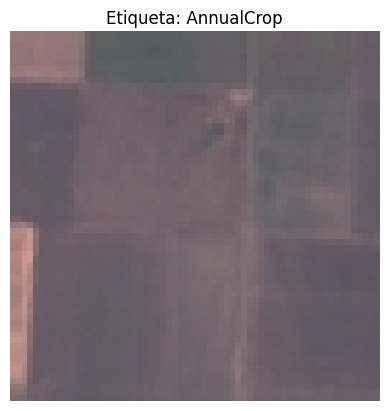

In [31]:
image = dataset["train"][0]["image"]
label = id2label[dataset["train"][0]["label"]]

show_image(image, label)

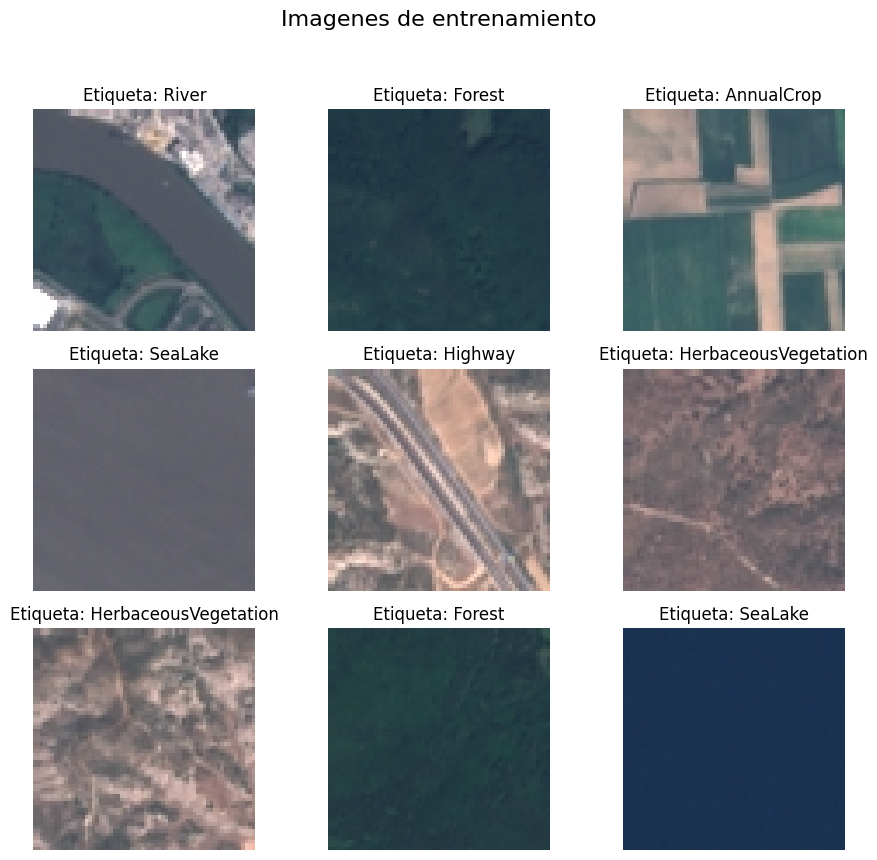

In [32]:
max_images = len(dataset["train"])
random_indices = random.sample(range(max_images), 9)

grid_data = {
    "images": [dataset["train"][i]["image"] for i in random_indices],
    "labels": [id2label[dataset["train"][i]["label"]] for i in random_indices]
}

show_image_grid(grid_data, title="Imagenes de entrenamiento", num_cols=3)

In [ ]:
# TODO: Análisis de distribución de clases
# TODO: Pandas-profiling?